<a href="https://colab.research.google.com/github/elvisgitau10/Identifying-patients-with-COVID-19/blob/main/Prject_COVID_CT_(Part_II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import densenet
from keras.preprocessing.image import ImageDataGenerator
from  keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np


In [ ]:
# Use transfer learning with DenseNet169
base_model = densenet.DenseNet169(weights="imagenet", include_top = False)
x= base_model.output
x=GlobalAveragePooling2D()(x)
x = Dropout (0.5)(x)

preds = Dense (2,activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs = preds )

In [ ]:
# declare batch size
BATCH_size =16


In [ ]:
# declare ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   brightness_range = [0.2,1.0],
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
# create generators
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/CT Scans/output/train/",
                                                    target_size = (480,480),
                                                     color_mode = "rgb",
                                                    batch_size=BATCH_size,
                                                    class_mode ="categorical",
                                                    shuffle =True)

Found 521 images belonging to 2 classes.


In [ ]:
# create generators
val_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/CT Scans/output/val/",
                                                    target_size = (480,480),
                                                     color_mode = "rgb",
                                                    batch_size=BATCH_size,
                                                    class_mode ="categorical",
                                                    shuffle =True)

Found 111 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/CT Scans/output/test/",
                                                  shuffle= False)

Found 114 images belonging to 2 classes.


In [ ]:
# declare callbacks for our model training
es = EarlyStopping(monitor= "val_loss", patience= 3)
mc = ModelCheckpoint("/content/drive/MyDrive/Project COVID-CT/best_model.h5",
                     save_best_only = True)

In [ ]:
# compile model for training
model.compile(optimizer= Adam(learning_rate = 0.0001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# train our model
history = model.fit (train_generator,
                     steps_per_epoch = train_generator.samples // BATCH_size,
                     validation_data = val_generator,
                     validation_steps = val_generator.samples // BATCH_size,
                     epochs = 50,
                     callbacks = [es,mc])


Epoch 1/50
32/32 [==============================] - 246s 5s/step - loss: 0.7084 - accuracy: 0.5701 - val_loss: 0.5949 - val_accuracy: 0.7188
Epoch 2/50
32/32 [==============================] - 42s 1s/step - loss: 0.4153 - accuracy: 0.8176 - val_loss: 0.5829 - val_accuracy: 0.6667
Epoch 3/50
32/32 [==============================] - 42s 1s/step - loss: 0.3600 - accuracy: 0.8632 - val_loss: 0.4566 - val_accuracy: 0.8229
Epoch 4/50
32/32 [==============================] - 42s 1s/step - loss: 0.2726 - accuracy: 0.8956 - val_loss: 0.4506 - val_accuracy: 0.8229
Epoch 5/50
32/32 [==============================] - 42s 1s/step - loss: 0.1561 - accuracy: 0.9524 - val_loss: 0.3788 - val_accuracy: 0.7917
Epoch 6/50
32/32 [==============================] - 42s 1s/step - loss: 0.2415 - accuracy: 0.9066 - val_loss: 0.3804 - val_accuracy: 0.8333
Epoch 7/50
32/32 [==============================] - 42s 1s/step - loss: 0.1329 - accuracy: 0.9472 - val_loss: 0.3970 - val_accuracy: 0.7917
Epoch 8/50
32/32 [=

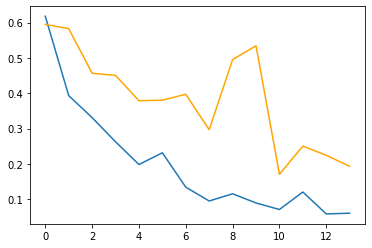

In [ ]:
plt. plot(history.epoch, history.history["loss"])
plt. plot(history.epoch, history.history["val_loss"], color ="orange")

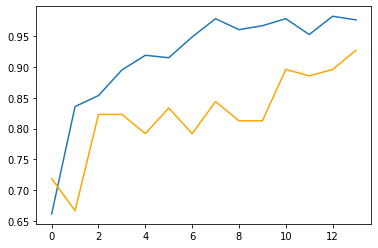

In [ ]:
plt. plot(history.epoch, history.history["accuracy"])
plt. plot(history.epoch, history.history["val_accuracy"], color ="orange")

In [ ]:
# look at the test generator classes
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
# make predictions using test dat
predictions = model.predict(test_generator)
predictions

array([[2.67862469e-01, 8.45108747e-01],
       [9.57609534e-01, 1.53121114e-01],
       [7.06668794e-01, 6.13722384e-01],
       [9.99991059e-01, 3.81607824e-05],
       [1.09540742e-04, 9.99966502e-01],
       [7.39009023e-01, 4.00233209e-01],
       [9.99999762e-01, 3.08824006e-08],
       [9.99999762e-01, 3.24602439e-07],
       [9.99746144e-01, 3.45271284e-04],
       [4.98605566e-03, 9.90388453e-01],
       [9.98525202e-01, 2.29477533e-03],
       [9.99436915e-01, 1.23933959e-03],
       [8.87413502e-01, 7.43939355e-02],
       [9.96726751e-01, 2.92296195e-03],
       [9.99999404e-01, 5.52915481e-07],
       [9.99997377e-01, 1.55764712e-06],
       [9.98407781e-01, 3.55471927e-03],
       [9.99832034e-01, 1.57148606e-04],
       [1.00000000e+00, 6.21999452e-10],
       [9.93428051e-01, 2.83612963e-02],
       [6.30848885e-01, 7.18632936e-01],
       [9.99999523e-01, 6.82564803e-07],
       [9.99995828e-01, 1.85138197e-05],
       [9.99997377e-01, 3.66113863e-06],
       [9.179416

In [ ]:
# use numpy to get predicted classses out
single_pred = np.argmax(predictions, axis =1)
single_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
confusion_matrix(test_generator.classes, single_pred)

array([[45,  8],
       [ 3, 58]])

In [ ]:
print(classification_report(test_generator.classes, single_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.88      0.95      0.91        61

    accuracy                           0.90       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



In [ ]:
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Project COVID-CT/best_model.h5")
saved_model

In [ ]:
saved_model_predictions = saved_model.predict(test_generator)

In [ ]:
saved_single_pred = np.argmax(saved_model_predictions, axis =1)
saved_single_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
confusion_matrix(test_generator.classes, saved_single_pred)

array([[23, 30],
       [ 0, 61]])

In [ ]:
print(classification_report(test_generator.classes, saved_single_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.61        53
           1       0.67      1.00      0.80        61

    accuracy                           0.74       114
   macro avg       0.84      0.72      0.70       114
weighted avg       0.82      0.74      0.71       114

